<a href="https://colab.research.google.com/github/drgnav/simple-bug-tracker/blob/master/test_work_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, pylab


In [2]:
def plot_lines(df):
    start_date = df.iloc[0, 0]
    end_date = df.iloc[-1, 0]
    ax = df.plot(x="Date", y=["Open", "Close", "Low", "High"], rot=25)

    # set the title
    plt.title(f'Линейные графики цен по дням за период {start_date} - {end_date}')
    # show the plot
    plt.show()


def plot_candles(df):
    print(df.head())
    start_date = df.iloc[0, 0]
    end_date = df.iloc[-1, 0]

    plt.figure()
    width = .4
    width2 = .05

    up = df[df.Close >= df.Open]
    down = df[df.Close < df.Open]

    col1 = 'green'
    col2 = 'red'

    plt.bar(up.index, up.Close - up.Open, width, bottom=up.Open, color=col1)
    plt.bar(up.index, up.High - up.Close, width2, bottom=up.Close, color=col1)
    plt.bar(up.index, up.Low - up.Open, width2, bottom=up.Open, color=col1)

    plt.bar(down.index, down.Close - down.Open, width, bottom=down.Open, color=col2)
    plt.bar(down.index, down.High - down.Open, width2, bottom=down.Open, color=col2)
    plt.bar(down.index, down.Low - down.Close, width2, bottom=down.Close, color=col2)

    plt.xticks(rotation=45, ha='right')
    plt.title(f'Свечи за период {start_date} - {end_date}')

    plt.show()


Загружаем данные из набора

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Colab Notebooks/

name = 'ge.us.txt'
df = pd.read_csv(name)
df = df.drop(columns=['OpenInt'])
df


Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks


,Date,Open,High,Low,Close,Volume
0,1962-01-02,0.6277,0.6362,0.6201,0.6201,2575579
1,1962-01-03,0.6201,0.6201,0.6122,0.6201,1764749
2,1962-01-04,0.6201,0.6201,0.6037,0.6122,2194010
3,1962-01-05,0.6122,0.6122,0.5798,0.5957,3255244
4,1962-01-08,0.5957,0.5957,0.5716,0.5957,3696430
...,...,...,...,...,...,...
14053,2017-11-06,20.5200,20.5300,20.0800,20.1300,60641787
14054,2017-11-07,20.1700,20.2500,20.1200,20.2100,41622851
14055,2017-11-08,20.2100,20.3200,20.0700,20.1200,39672190
14056,2017-11-09,20.0400,20.0710,19.8500,19.9900,50831779


Получили данные с колонками:
Date  - дата торгов
Open  - Цена бумаг на открытие торгов
Close - Цена бумаг на закрытие торгов
High  - Максимальная цена за время торгов
Low   - Минимальная цена за время торгов

Выделяем условные поля и чисдовые

In [4]:
all_columns = list(df.columns.to_series())
numeric_columns = list(df.select_dtypes(include=np.number))
conventional_columns = []

row_count = df.shape[0]
column_count = df.shape[1]

for i in all_columns:
    unique = df[i].unique()
    if len(unique) == 2:
        conventional_columns.append(i)
print(f"Числовые поля: {numeric_columns}")
print(f"Условные поля: {conventional_columns}")


Числовые поля: ['Open', 'High', 'Low', 'Close', 'Volume']
Условные поля: []


Выводим статистику по набору данных

In [5]:
print(f'Data Frame from file "{name}" has {row_count} rows and {column_count} columns')

Data Frame from file "ge.us.txt" has 14058 rows and 6 columns


In [6]:
print("Exploratory Data Analysis for numeric columns is starting...")
for i in numeric_columns:
    dfi = df[i]
    print("\tPercent of empty values in column '{}' is {:.4f}%".format(i, (dfi.isna().sum() / dfi.size) * 100))
    print("\tMin value for column '{}' is {} and max value is {}".format(i, dfi.min(), dfi.max()))
    print("\tAverage value for column '{}' is {:.2f}".format(i, dfi.mean()))
    print("\tMedian value for column '{}' is {:.2f}".format(i, dfi.median()))
    print("\tDispersion for column '{}' is {:.2f}".format(i, dfi.var()))
    print("\tQuantiles 0.1, 0.9 for column '{}' are {:.2f},  {:.2f}".format(i, dfi.quantile(0.1), dfi.quantile(0.9)))
    print("\tQuartiles 1(0.25), 3(0.75) for column '{}' are {:.2f}, {:.2f}\n"
          .format(i, dfi.quantile(0.25), dfi.quantile(0.75)))


Exploratory Data Analysis for numeric columns is starting...
	Percent of empty values in column 'Open' is 0.0000%
	Min value for column 'Open' is 0.45902 and max value is 47.751
	Average value for column 'Open' is 10.53
	Median value for column 'Open' is 3.88
	Dispersion for column 'Open' is 137.90
	Quantiles 0.1, 0.9 for column 'Open' are 0.73,  28.63
	Quartiles 1(0.25), 3(0.75) for column 'Open' are 0.90, 21.42

	Percent of empty values in column 'High' is 0.0000%
	Min value for column 'High' is 0.4669 and max value is 48.459
	Average value for column 'High' is 10.64
	Median value for column 'High' is 3.91
	Dispersion for column 'High' is 140.87
	Quantiles 0.1, 0.9 for column 'High' are 0.74,  28.82
	Quartiles 1(0.25), 3(0.75) for column 'High' are 0.91, 21.66

	Percent of empty values in column 'Low' is 0.0000%
	Min value for column 'Low' is 0.45114 and max value is 47.596
	Average value for column 'Low' is 10.42
	Median value for column 'Low' is 3.82
	Dispersion for column 'Low' is

In [7]:
print("Exploratory Data Analysis for conventional columns is starting...")
if len(conventional_columns) == 0:
    print("\tNo columns")
for i in conventional_columns:
    dfi = df[i]
    unique = dfi.unique()
    print("\tPercent of empty values in column '{}' is {:.4f}%".format(i, (dfi.isna().sum() / dfi.size) * 100))
    print("\tNumber of unique values in column  '{}' is {} - {}".format(i, len(unique), unique))
    print("\tMode: {}".format(dfi.mode()).replace('\n', '. '))


Exploratory Data Analysis for conventional columns is starting...
	No columns


Выводим линейные графики по нашему набору за весь период

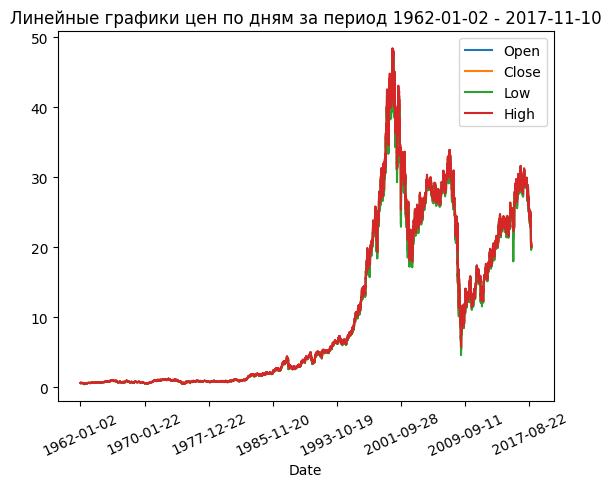

In [8]:
plot_lines(df)

Выводим линейные графики по нашему набору за последний месяц в наборе

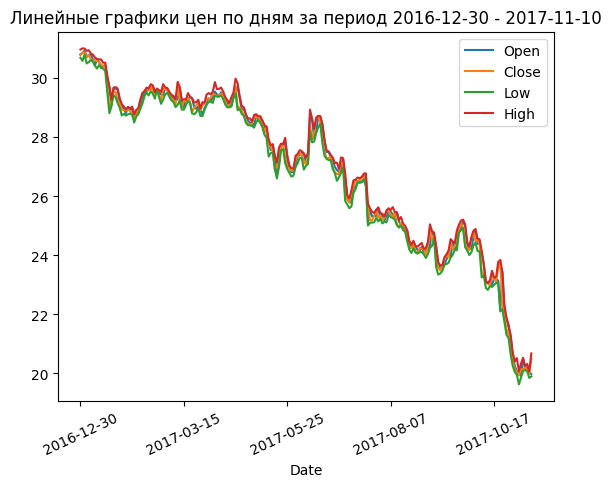

In [9]:
plot_lines(df[-219:])

Выводим график в виде свечей за последние 30 дней
Свеча включает Open, Close, High, Low

             Date   Open   High    Low  Close    Volume
14028  2017-10-02  24.22  24.61  24.10  24.57  42492891
14029  2017-10-03  24.61  24.83  24.33  24.80  33882815
14030  2017-10-04  24.88  24.89  24.43  24.48  32111390
14031  2017-10-05  24.39  24.57  24.15  24.54  34755184
14032  2017-10-06  24.41  24.54  24.13  24.39  40678189


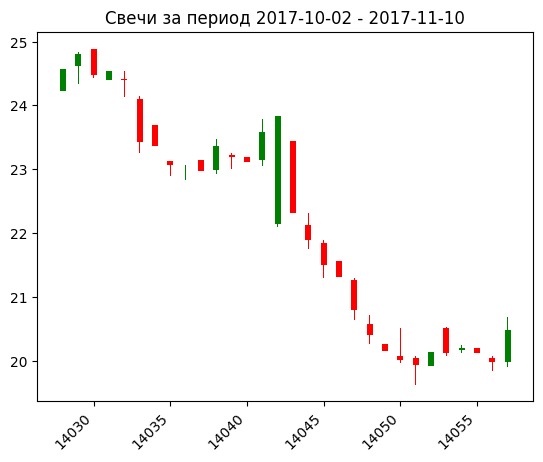

In [10]:
plot_candles(df[-30:])

Поготавливаем данные для подтвеждения гипотез

In [11]:
df_dif = pd.DataFrame(columns=['Open-Close', 'High-Low', 'Volume', 'Day'])
df_dif['Open-Close'] = abs(df['Open'] - df['Close'])
df_dif['High-Low'] = df['High'] - df['Low']
df_dif['Volume'] = df['Volume']
df_dif['Day'] = df['Date'].str[8:].astype(int)
df_dif


,Open-Close,High-Low,Volume,Day
0,0.0076,0.0161,2575579,2
1,0.0000,0.0079,1764749,3
2,0.0079,0.0164,2194010,4
3,0.0165,0.0324,3255244,5
4,0.0000,0.0241,3696430,8
...,...,...,...,...
14053,0.3900,0.4500,60641787,6
14054,0.0400,0.1300,41622851,7
14055,0.0900,0.2500,39672190,8
14056,0.0500,0.2210,50831779,9


In [12]:
df_vol = df_dif.iloc[:, 2:]
df_vol = df_vol.groupby(['Day']).sum()
df_vol['idx'] = df_vol.index

Прверяем гипотезу - разница между Low и Hght зависит от высоты свечи

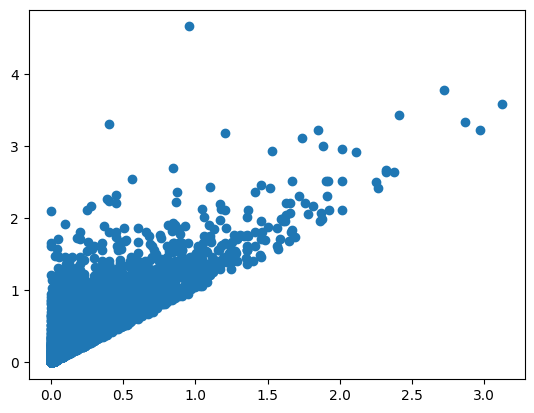

In [13]:
plt.scatter(df_dif['Open-Close'], df_dif['High-Low'])
plt.show()

Гипотеза подтверждена

Проверяем гипотезу максимальный объем продаж приходится на середину месяца c 10 по 20 число

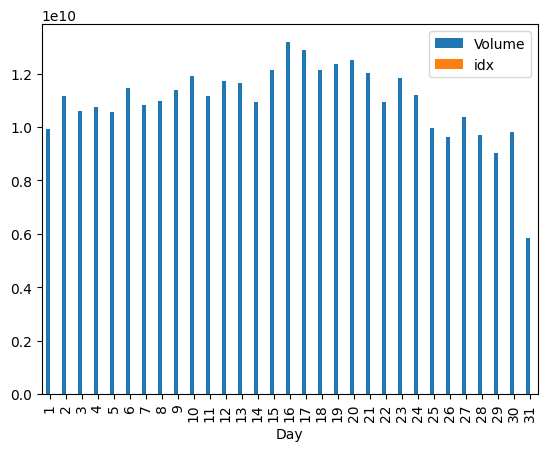

Объем торгов в начале месяца: 109561544946
Объем торгов в середине месяца: 132724179269
Объем торгов в конце месяца: 98348954950


In [14]:
df_vol.plot.bar()
plt.show()

print(f"Объем торгов в начале месяца: {df_vol.iloc[0:10, 0].sum()}")
print(f"Объем торгов в середине месяца: {df_vol.iloc[10:21, 0].sum()}")
print(f"Объем торгов в конце месяца: {df_vol.iloc[21:, 0].sum()}")


Гипотеза подтверждена